In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as ppt

data = pd.read_csv(r"totalFertility.csv")
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

In [3]:
print(x)

[[  1.3   14.7   37.68]
 [  0.9   14.45  37.46]
 [  7.7   14.2   26.8 ]
 [ 17.8   13.95  26.28]
 [ 17.3   13.7   28.66]
 [ 15.2   13.45  21.27]
 [ 15.6   13.2   16.4 ]
 [-10.9   13.04  29.46]
 [ -6.2   12.88  38.07]
 [  1.8   12.72  36.17]
 [  0.4   12.56  36.53]
 [  2.4   12.4   37.61]
 [  0.9   12.24  39.34]
 [ -1.9   12.08  38.76]
 [  1.2   11.92  38.76]
 [  0.    11.76  40.1 ]
 [ -2.7   11.6   44.71]
 [ -8.9   11.32  53.21]
 [-10.3   11.04  59.06]
 [ -5.2   10.76  53.58]
 [  3.5   10.48  46.7 ]
 [  2.6   10.2   42.88]
 [  1.     9.92  39.28]
 [  3.7    9.64  37.8 ]
 [ -2.     9.36  39.3 ]
 [ -1.3    9.08  37.33]
 [  0.7    8.8   35.63]
 [  5.1    8.61  36.75]
 [ 10.9    8.42  31.98]
 [  6.     8.23  32.79]
 [  1.6    8.04  31.41]
 [  2.3    7.85  28.24]
 [  8.5    7.66  25.28]
 [ 14.4    7.47  19.34]
 [  7.7    7.28  13.87]
 [ -1.     7.09  13.46]
 [  1.1    6.9   13.14]
 [  7.9    6.75  12.16]
 [  2.3    6.6   12.69]
 [  0.8    6.45  12.02]
 [  0.3    6.3   11.58]
 [ -0.3    6.15 

In [4]:
print(y)

[126.6 125.  123.4 121.  119.8 111.2 117.9 119.8 111.2 110.5 110.9 106.6
 102.6  99.8  93.8  89.3  89.2  84.6  81.7  76.3  78.5  77.2  75.8  77.1
  79.1  77.6  79.9  83.4  91.5  94.3  88.8  85.9 101.9 113.3 107.3 107.1
 106.2 111.4 113.8 115.  117.9 118.3 121.  122.7 120.  119.9 118.  117.1
 112.  108.3 104.7  96.3  90.8  87.2  85.2  86.1  87.9]


In [5]:
xtn,xtt,ytn,ytt = tts(x,y,test_size=0.25,random_state=4)

In [6]:
model = DecisionTreeRegressor(max_depth = 57)
model.fit(xtn,ytn)
model.predict([[8,14,1]])

array([121.])

In [7]:
print(model.score(x,y))

0.9409891945422227


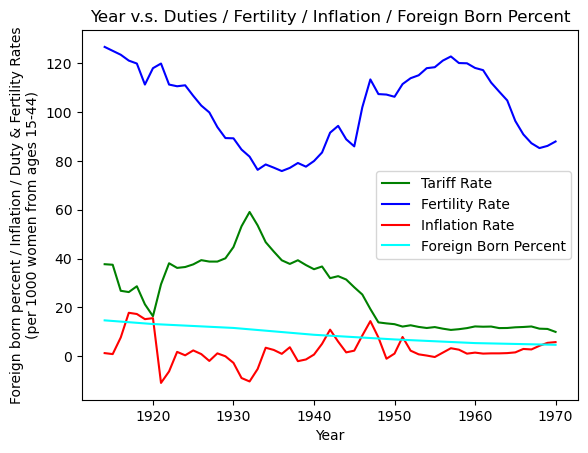

In [8]:
ppt.title('Year v.s. Duties / Fertility / Inflation / Foreign Born Percent')
ppt.xlabel('Year')
ppt.ylabel('Foreign born percent / Inflation / Duty & Fertility Rates\n(per 1000 women from ages 15-44)')
years = data.iloc[:,0].values

ppt.plot(years,x[:,2],color='green')
ppt.plot(years,y,color='blue')
ppt.plot(years,x[:,0],color='red')
ppt.plot(years,x[:,1],color='cyan')
ppt.legend(['Tariff Rate','Fertility Rate','Inflation Rate','Foreign Born Percent'])
ppt.savefig('plot1.png')

In [9]:
# With the previous model for duties, can we make a model out of that plotting another potential "fertility cycle"

data1 = pd.read_csv('iif.csv')
x1 = data1.iloc[:,:-1].values
y1 = data1.iloc[:,-1].values

xtn1,xtt1,ytn1,ytt1 = tts(x1,y1,test_size=0.25,random_state=4)

model1 = DecisionTreeRegressor(max_depth = 57)
model1.fit(xtn1,ytn1) # R-Squared value is 0.9698673465963251
print(model1.score(x1,y1))

0.9696876449328189


In [10]:
topred = pd.read_csv(r"2pred.csv")
topred = topred.iloc[:,:].values
years = list(range(1971,2022))

duties = model1.predict(topred)
topred = np.column_stack((topred,duties))
print(topred)

[[ 4.3   4.85 12.2 ]
 [ 3.3   5.   11.99]
 [ 6.2   5.15  9.98]
 [11.1   5.3   9.98]
 [ 9.1   5.45  9.98]
 [ 5.7   5.6   9.98]
 [ 6.5   5.75  9.98]
 [ 7.6   5.9   9.98]
 [11.3   6.05  9.98]
 [13.5   6.2   9.98]
 [10.3   6.37  9.98]
 [ 6.1   6.54 13.87]
 [ 3.2   6.71 12.69]
 [ 4.3   6.88 12.69]
 [ 3.5   7.05 12.69]
 [ 1.9   7.22 12.69]
 [ 3.7   7.39 19.34]
 [ 4.1   7.56 19.34]
 [ 4.8   7.73 28.24]
 [ 5.4   7.9  28.24]
 [ 4.2   8.22 32.79]
 [ 3.    8.54 36.75]
 [ 3.    8.86 36.75]
 [ 2.6   9.18 35.63]
 [ 2.8   9.5  37.8 ]
 [ 2.9   9.82 37.8 ]
 [ 2.3  10.14 42.88]
 [ 1.6  10.46 42.88]
 [ 2.2  10.78 42.88]
 [ 3.4  11.1  40.1 ]
 [ 2.8  11.28 40.1 ]
 [ 1.6  11.46 40.1 ]
 [ 2.3  11.64 40.1 ]
 [ 2.7  11.82 40.1 ]
 [ 3.4  12.   40.1 ]
 [ 3.2  12.18 40.1 ]
 [ 2.9  12.36 36.17]
 [ 3.8  12.54 36.17]
 [-0.4  12.72 36.53]
 [ 1.6  12.9  36.17]
 [ 3.2  13.02 36.17]
 [ 2.1  13.14 36.17]
 [ 1.5  13.26 36.17]
 [ 1.6  13.38 36.17]
 [ 0.1  13.5  36.53]
 [ 1.3  13.55 36.17]
 [ 2.1  13.6  37.46]
 [ 2.4  13.65

In [11]:
ferts = model.predict(topred)
print(ferts)

[ 86.1  90.8 104.7 120.  120.  120.  120.  121.  121.  121.  121.  107.3
 113.8 113.8 113.8 113.8 107.3 107.3  94.3  94.3  94.3  77.1  77.1  77.1
  77.1  77.1  77.2  75.8  77.2  81.7  89.2  89.2  89.2  89.3  89.3  89.3
 110.5 110.5 110.9 110.5 110.5 110.5 110.5 110.5 110.9 110.5 110.5 110.5
 125.  110.5 110.5]


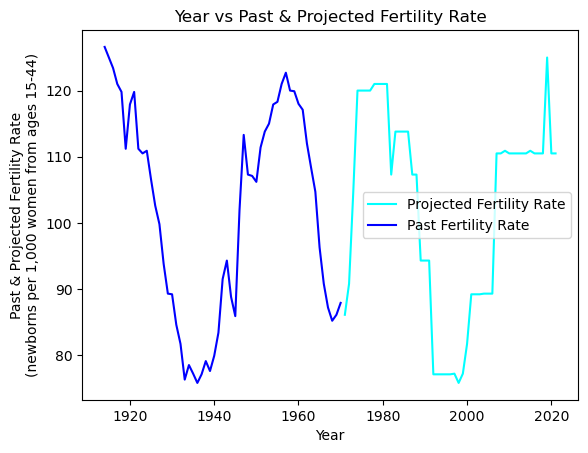

In [12]:
ppt.clf()
ppt.xlabel('Year')
ppt.ylabel('Predicted Fertility Rate\n(newborns per 1,000 women from ages 15-44)')
ppt.title('Year vs Predicted Fertility Rate')
ppt.plot(years,ferts,color='cyan')
ppt.savefig('plot2.png')

# This is a combined plot
ppt.ylabel('Past & Projected Fertility Rate\n(newborns per 1,000 women from ages 15-44)')
ppt.title('Year vs Past & Projected Fertility Rate')
ppt.plot(list(range(1914,1971)),y,color='blue')
ppt.legend(['Projected Fertility Rate','Past Fertility Rate'])
ppt.savefig('plot3.png')

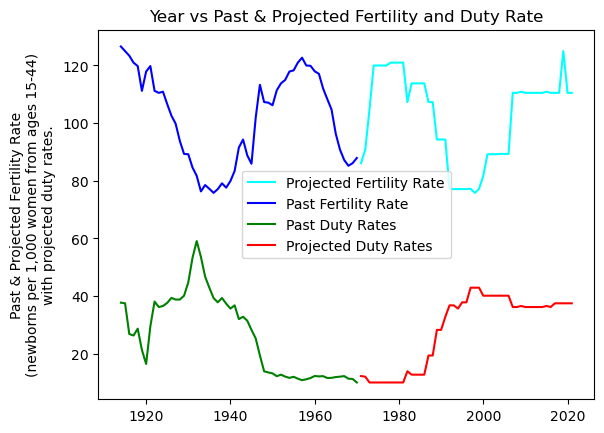

In [15]:
# This is another combined plot
ppt.ylabel('Past & Projected Fertility Rate\n(newborns per 1,000 women from ages 15-44)\nwith projected duty rates.')
ppt.title('Year vs Past & Projected Fertility and Duty Rate')
ppt.plot(years,ferts,color='cyan')
ppt.plot(list(range(1914,1971)),y,color='blue')
ppt.plot(list(range(1914,1971)),y1,color='green')
ppt.plot(list(range(1971,2022)),duties,color='red')
ppt.legend(['Projected Fertility Rate','Past Fertility Rate','Past Duty Rates','Projected Duty Rates'])
ppt.savefig('plot4.png')